# Colocando Modelos em Produção Part3

<div>
<img src="imgs/andre-barbosa.png" width="200"/>
</div>

Esse sou eu :)

- DS @QuintoAndar
- Mestrando @IME-USP
- [pode mandar mensagem a vonts, só avisa de onde você veio :)](https://www.linkedin.com/in/barbosaandre)

# Agenda

- Servindo modelos com Flask localmente
- Entendendo Servidores
- Fazendo Deploy no Heroku

# Colocando Modelos em Produção



## Salvamos o modelo, mas e como colocamos no ar?

Existem várias formas de colocar o modelo no ar. Como temos uma aplicação leve, usaremos o [Flask](https://flask.palletsprojects.com/en/1.1.x/)

> Flask is a lightweight WSGI (Web Server Gateway Interface) web application framework. It is designed to make getting started quick and easy, with the ability to scale up to complex applications. It began as a simple wrapper around Werkzeug and Jinja and has become one of the most popular Python web application frameworks.

Vamos voltar ao nosso serve.py

# Usando o flask

Usar o flask é algo relativamente simples:

```
from flask import Flask
app = Flask(__name__)
if __name__ == '__main__':
     app.run(port=8080)
```

No caso, estaremos rodando um servidor na porta 8080

# Mas o que é uma porta?



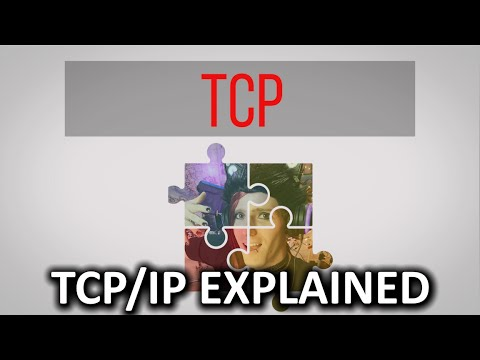

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('PpsEaqJV_A0', end=275)

![](imgs/tcp-joke.jpg)

# Como que fazemos requisições?

Bom, seria legal a gente ter uma API que nós fizessemos requisições. Que tal um `/predict` em que enviamos os dados via POST?

## GET vs POST

Para isso, antes, precisamos entender o que é [HTTP](https://www.w3schools.com/tags/ref_httpmethods.asp)

> What is HTTP?
The Hypertext Transfer Protocol (HTTP) is designed to enable communications between clients and servers.

> HTTP works as a request-response protocol between a client and server.

> Example: A client (browser) sends an HTTP request to the server; then the server returns a response to the client. The response contains status information about the request and may also contain the requested content.

> GET is used to request data from a specified resource.

> POST is used to send data to a server to create/update a resource.

# Voltando para o Flask

```
@app.route('/predict', methods=['POST'])
def predict():
     json_ = request.json
     result = run_pipeline(pipeline, **json_)
     return jsonify({'prediction': list(prediction)})

```

# Como fazemos requisições?

Iremos usar o [postman](https://web.postman.co/build/workspace)!

Para gerar o seguinte código:

```
curl --location --request POST 'http://127.0.0.1:8080/predict' \
--header 'Content-Type: application/json' \
--data-raw '{
    "LotArea": 8414,
    "YearBuilt": 1963,
    "OverallQual":6
}'
```

# Mas e o Docker?

`docker run -d -it -p 8000:5000 somostera:1.0 python scripts/serve.py`


`docker port <container-id>`

[Mas por que estamos escolhendo esses números?](https://web.mit.edu/rhel-doc/4/RH-DOCS/rhel-sg-en-4/ch-ports.html)

# Os conceitos de Produção, Staging, Desenvolvimento

[Para saber mais!](https://dev.to/flippedcoding/difference-between-development-stage-and-production-d0p)

## Development

> This is the environment that's on your computer. Here is where you'll do all of your code updates. It's where all of your commits and branches live along with those of your co-workers. The development environment is usually configured differently from the environment that users work in.
It'll be connected to some local database or a dummy database so that you can write your code without messing up the real data

## Staging

> The stage environment is as similar to the production environment as it can be. You'll have all of the code on a server this time instead of a local machine. It'll connect to as many services as it can without touching the production environment.

> All of the hard core testing happens here. Any database migrations will be tested here and so will any configuration changes

## Production

> Every time you talk about making your project live, this is the environment you are talking about. The production environment is where users access the final code after all of the updates and testing. Of all the environments, this one is the most important.

Conseguimos ver, então, que todo o processo que fizemos no ambiente de desenvolvimento. Chegou a hora de colocarmos em um servidor e, enfim, abrir esse cara para o mundo!

# Mas o que é um servidor?

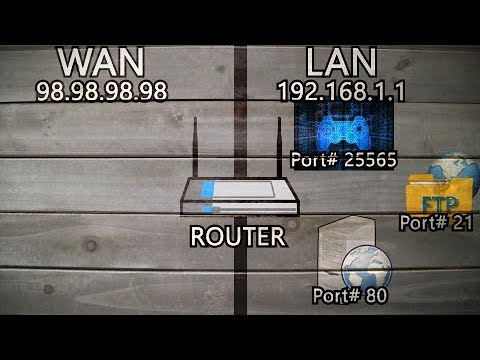

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jfSLxs40sIw', start=16, end=161)

Para fazermos isso, iremos usar o [Heroku](https://www.heroku.com/)!

> Heroku is a platform as a service based on a managed container system, with integrated data services and a powerful ecosystem, for deploying and running modern apps. The Heroku developer experience is an app-centric approach for software delivery, integrated with today’s most popular developer tools and workflows.

![](imgs/heroku-1.png)